In [1]:
#Activate env before running jupyter-notebook
#conda activate tf-gpu
from zlib import crc32
import numpy as np
import tensorflow as tf

In [2]:
tf.test.is_gpu_available(
    cuda_only=False, min_cuda_compute_capability=None
)

Instructions for updating:
Use `tf.config.list_physical_devices('GPU')` instead.


True

In [3]:
tf.config.list_physical_devices('GPU')

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [4]:
tf.test.is_gpu_available(cuda_only=True)

True

In [5]:
import os
import tarfile
import urllib

In [6]:
DOWNLOAD_ROOT = "https://raw.githubusercontent.com/ageron/handson-ml2/master/"
HOUSING_PATH = os.path.join("datasets", "housing")
HOUSING_URL = DOWNLOAD_ROOT + "datasets/housing/housing.tgz"

In [7]:
def fetch_housing_data(housing_url=HOUSING_URL, housing_path=HOUSING_PATH):
     os.makedirs(housing_path, exist_ok=True)
     tgz_path = os.path.join(housing_path, "housing.tgz")
     urllib.request.urlretrieve(housing_url, tgz_path)
     housing_tgz = tarfile.open(tgz_path)
     housing_tgz.extractall(path=housing_path)
     housing_tgz.close()

In [8]:
import pandas as pd

In [9]:
def load_housing_data(housing_path=HOUSING_PATH):
    csv_path = os.path.join(housing_path, "housing.csv")
    return pd.read_csv(csv_path)                 #returns dataFrame

In [10]:
fetch_housing_data()

In [11]:
housing=load_housing_data()

In [12]:

#DataFrame.head(n=5)[source]
'''Return the first n rows.

This function returns the first n rows for the object based on position. 
It is useful for quickly testing if your object has the right type of data in it.

For negative values of n, this function returns all rows except the last n rows, equivalent to df[:-n].

Parameters
nint, default 5
Number of rows to select.

Returns
same type as caller
The first n rows of the caller object.'''

'Return the first n rows.\n\nThis function returns the first n rows for the object based on position. \nIt is useful for quickly testing if your object has the right type of data in it.\n\nFor negative values of n, this function returns all rows except the last n rows, equivalent to df[:-n].\n\nParameters\nnint, default 5\nNumber of rows to select.\n\nReturns\nsame type as caller\nThe first n rows of the caller object.'

In [13]:
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [14]:
housing.info() #Print a concise summary of a DataFrame.

#This method prints information about a DataFrame including the index dtype and columns, non-null values and memory usage.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [15]:
housing['ocean_proximity'].value_counts() #Return a Series containing counts of unique rows in the DataFrame.

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [16]:
housing.describe() #Generate descriptive statistics.

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [17]:
%matplotlib inline 
# only in a Jupyter notebook
import matplotlib.pyplot as plt

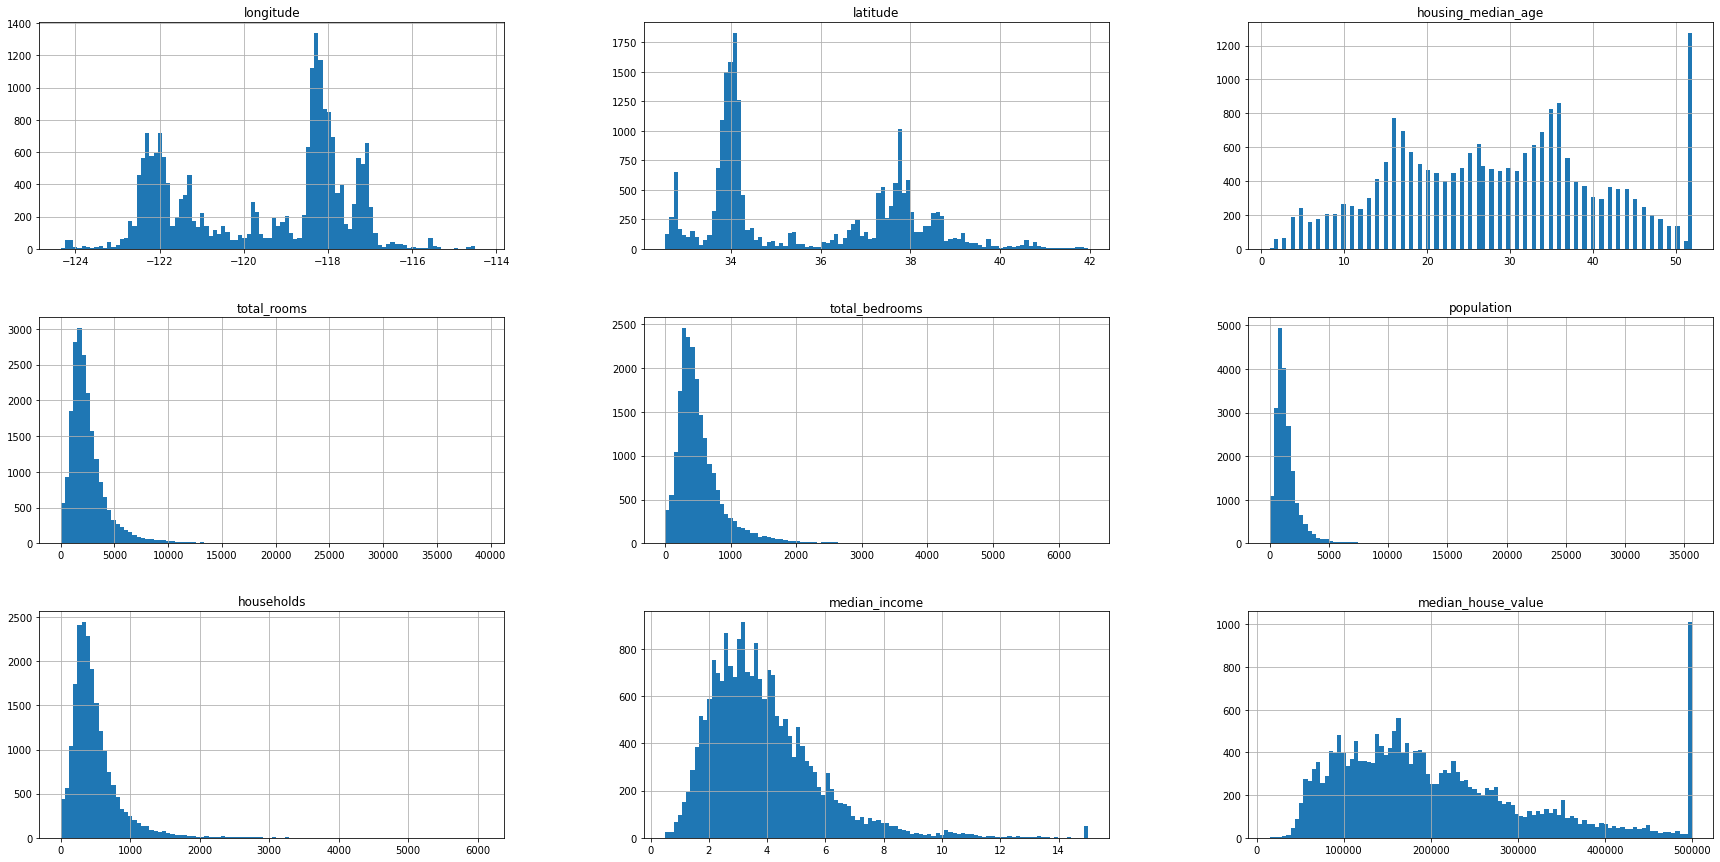

In [18]:
housing.hist(bins=100, figsize=(30,15))  #Number of histogram bins(verticsl bars) to be used. Figsize(figuresize)-The size in inches of the figure to create. 
plt.show()

#Creating tst data

In [19]:
def split_train_test(data, test_ratio):
    #np.random.seed(42) #seed can be provided to fix the test data-same shuffled data
     shuffled_indices = np.random.permutation(len(data))        #np.random.permutation- gives random array of the length provided
     test_set_size = int(len(data) * test_ratio)
     test_indices = shuffled_indices[:test_set_size]
     train_indices = shuffled_indices[test_set_size:]
     return data.iloc[train_indices], data.iloc[test_indices]


In [20]:
train_set, test_set = split_train_test(housing, 0.2)

In [21]:
print(len(train_set),len(test_set))

16512 4128


In [22]:
from sklearn.model_selection import train_test_split


In [23]:
from zlib import crc32


In [24]:
#
def test_set_check(identifier, test_ratio):
        return crc32(np.int64(identifier)) & 0xffffffff < test_ratio * 2**32


In [25]:
def split_train_test_by_id(data, test_ratio, id_column):
    ids = data[id_column]
    in_test_set = ids.apply(lambda id_: test_set_check(id_, test_ratio))
    return data.loc[~in_test_set], data.loc[in_test_set]

In [26]:
housing_with_id = housing.reset_index()   # adds an `index` column
train_set, test_set = split_train_test_by_id(housing_with_id, 0.2, "index")

In [27]:
housing_with_id["id"] = housing["longitude"] * 1000 + housing["latitude"]
train_set, test_set = split_train_test_by_id(housing_with_id, 0.2, "id")

In [28]:
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(housing, test_size=0.2, random_state=42)

In [29]:
#cut can convert to range from discrete values
#Use cut when you need to segment and sort data values into bins. 
#This function is also useful for going from a continuous variable to a categorical variable. 
#For example, cut could convert ages to groups of age ranges. 
#Supports binning into an equal number of bins, or a pre-specified array of bins.
housing["income_cat"] = pd.cut(housing["median_income"],
                               bins=[0., 1.5, 3.0, 4.5, 6., np.inf],
                               labels=[1, 2, 3, 4, 5])

<AxesSubplot:>

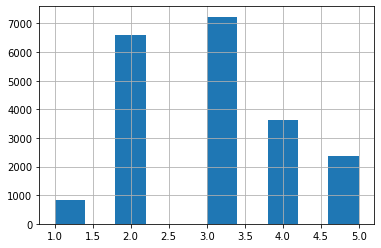

In [31]:
housing["income_cat"].hist()